# Basic Data Cleaning

Data cleaning is a critically important step in any machine learning project. In tabular data, there are many different statistical analysis and data visualization techniques you can use to explore your data in order to identify data cleaning operations you may want to perform. Before jumping to the sophisticated methods, there are some very basic data cleaning operations that you probably should perform on every single machine learning project. These are so basic that they are often overlooked by seasoned machine learning practitioners, yet are so critical that if skipped, models may break or report overly optimistic performance results. In this exercise, you will discover basic data cleaning you should always perform on your dataset. After completing this exercise, you will know:
- How to identify and remove column variables that only have a single value.
- How to identify and consider column variables with very few unique values.
- How to identify and remove rows that contain duplicate observations.

---

## 1. Exercise Overview
This exercise is divided into seven parts; they are:
1. Messy Datasets
2. Identify Columns That Contain a Single Value
3. Delete Columns That Contain a Single Value
4. Consider Columns That Have Very Few Values
5. Remove Columns That Have A Low Variance
6. Identify Rows that Contain Duplicate Data
7. Delete Rows that Contain Duplicate Data

---

## 2. Messy Datasets
Data cleaning refers to identifying and correcting errors in the dataset that may negatively impact a predictive model. *Data cleaning* is used to refer to all kinds of tasks and activities to detect and repair errors in the data.

There are many types of errors that exist in a dataset, although some of the simplest errors include columns that don't contain much information and duplicated rows. Before we dive into identifying and correcting messy data, let's define some messy datasets. We will use two datasets as the basis for this exercise, the oil spill dataset and the iris flowers dataset. You can find the datasets attached in the zip file.

### 2.1. Oil Spill Dataset
The *oil spill* dataset is a standard machine learning dataset. The task involves predicting whether the patch contains an oil spill or not, e.g. from the illegal or accidental dumping of oil in the ocean, given a vector that describes the contents of a patch of a satellite image.

- Using NumPy, read the dataset and determine the total number of case entries. (Answer: 937)

In [1]:
import numpy as np

In [9]:
oilspill = np.genfromtxt('oil-spill.csv', delimiter = ',')
oilspill.shape

(937, 50)

- Given that each case comprises of $x$ number of numerical computer vision derived features, a patch number, and a class label, determine the value of $x$ (Answer: 48).

In [10]:
oilspill.shape[1] - 2

48

The normal case is no oil spill assigned the class label of $0$, whereas an oil spill is indicated by a class label of $1$.
- Given that the last column represents the class label, determine the number of cases of oil spills. (Answer: 41)

In [11]:
sum(1 for x in oilspill[:,-1] if x == 1)

41

Review the contents of the data file. We can see that the first column contains integers for the patch number. We can also see that the computer vision derived features are real-valued with differing scales such as thousands in the second column and fractions in other columns. This dataset contains columns with very few unique values that provides a good basis for data cleaning.

### 2.2. Iris Flowers Dataset
The *iris flowers* dataset is another standard machine learning dataset. The dataset involves predicting the flower species given measurements of iris flowers in centimeters. It is a multiclass classification problem. The number of observations for each class is balanced. There are 150 observations with 4 input variables and 1 output variable.

- Using Pandas, read the dataset and determine the total number of observations. (Answer: 150)

In [12]:
import pandas as pd

In [18]:
iris = pd.read_csv('iris.csv', header = None) # Must put header = None
iris.shape

(150, 5)

- Using the `head` method, display the first few lines of the file.

In [20]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We can see that all four input variables are numeric and that the target class variable is a string representing the iris flower species. This dataset contains duplicate rows that provides a good basis for data cleaning.

---

## 3. Identify Columns That Contain a Single Value

Columns that have a single observation or value are probably useless for modeling. These columns or predictors are referred to zero-variance predictors as if we measured the variance (average value from the mean), it would be zero.

Here, a single value means that each row for that column has the same value. For example, the column $X1$ has the value $1.0$ for all rows in the dataset:
```
X1
1.0
1.0
1.0
1.0
1.0
...
```

Columns that have a single value for all rows do not contain any information for modeling. Depending on the choice of data preparation and modeling algorithms, variables with a single value can also cause errors or unexpected results.

You can detect rows that have this property using the `unique()` NumPy function that will report the number of unique values in each column.
- From the oil-spill dataset, determine the number of unique values for each column using the `unique()` NumPy function. Your output should look look something similar to:

 ```
0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2
```

In [28]:
for i in range(oilspill.shape[1]):
    print(i, len(np.unique(oilspill[:,i])))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


We can see that column index 22 only has a single value and should be removed.

A simpler approach is to use the `nunique()` Pandas function that does the hard work for you.
- Read the *oil-spill* dataset using `read_csv` Pandas function.
- Using the `nunique()` function, determine the number of unique values for each column. You should get the same results.

In [41]:
oil_spill = pd.read_csv('oil-spill.csv', header = None)

oil_spill.nunique()

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64

---

## 4. Delete Columns That Contain a Single Value

Variables or columns that have a single value should probably be removed from your dataset.

Columns are relatively easy to remove from a NumPy array or Pandas DataFrame.
- From the oil-spill dataset, record all columns that have a single unique value, then delete them from the Pandas DataFrame by calling the `drop()` function. Your dataset should have a shape of `(937, 49)`.

In [42]:
oil_spill.drop(labels = 22, axis = 1, inplace = True) # Can just put 22 in the argument.

oil_spill.shape

(937, 49)

---

## 5. Consider Columns That Have Very Few Values

In the previous section, we saw that some columns in the example dataset had very few unique values. For example, there were columns that only had 2, 4, and 9 unique values. This might make sense for ordinal or categorical variables. In this case, however, the dataset only contains numerical variables. As such, only having 2, 4, or 9 unique numerical values in a column might be surprising. We can refer to these columns or predictors as near-zero variance predictors, as their variance is not zero, but a very small number close to zero. These columns may or may not contribute to the skill of a model. We cannot assume that they are useless to modeling. Depending on the choice of data preparation and modeling algorithms, variables with very few numerical values can also cause errors or unexpected results.

To help highlight columns of this type,
- calculate the number of unique values for each variable as a percentage of the total number of rows in the dataset. Let's do this on the oil-spill dataset using NumPy. 

 Expected output:
 ```
 0, 238, 25.4%
 1, 297, 31.7%
 2, 927, 98.9%
 3, 933, 99.6%
 4, 179, 19.1%
 5, 375, 40.0%
 6, 820, 87.5%
 7, 618, 66.0%
 8, 561, 59.9%
 9, 57, 6.1%
 10, 577, 61.6%
 11, 59, 6.3%
 12, 73, 7.8%
 13, 107, 11.4%
 14, 53, 5.7%
 15, 91, 9.7%
 16, 893, 95.3%
 17, 810, 86.4%
 18, 170, 18.1%
 19, 53, 5.7%
 20, 68, 7.3%
 21, 9, 1.0%
 22, 1, 0.1%
 23, 92, 9.8%
 24, 9, 1.0%
 25, 8, 0.9%
 26, 9, 1.0%
 27, 308, 32.9%
 28, 447, 47.7%
 29, 392, 41.8%
 30, 107, 11.4%
 31, 42, 4.5%
 32, 4, 0.4%
 33, 45, 4.8%
 34, 141, 15.0%
 35, 110, 11.7%
 36, 3, 0.3%
 37, 758, 80.9%
 38, 9, 1.0%
 39, 9, 1.0%
 40, 388, 41.4%
 41, 220, 23.5%
 42, 644, 68.7%
 43, 649, 69.3%
 44, 499, 53.3%
 45, 2, 0.2%
 46, 937, 100.0%
 47, 169, 18.0%
 48, 286, 30.5%
 49, 2, 0.2%
 ```

In [47]:
for i in range(oilspill.shape[1]):
    leng = len(np.unique(oilspill[:,i]))
    fract = len(np.unique(oilspill[:,i]))/oilspill.shape[0]
    print(i,',', leng,',', str(round(fract*100,1))+'%')

0 , 238 , 25.4%
1 , 297 , 31.7%
2 , 927 , 98.9%
3 , 933 , 99.6%
4 , 179 , 19.1%
5 , 375 , 40.0%
6 , 820 , 87.5%
7 , 618 , 66.0%
8 , 561 , 59.9%
9 , 57 , 6.1%
10 , 577 , 61.6%
11 , 59 , 6.3%
12 , 73 , 7.8%
13 , 107 , 11.4%
14 , 53 , 5.7%
15 , 91 , 9.7%
16 , 893 , 95.3%
17 , 810 , 86.4%
18 , 170 , 18.1%
19 , 53 , 5.7%
20 , 68 , 7.3%
21 , 9 , 1.0%
22 , 1 , 0.1%
23 , 92 , 9.8%
24 , 9 , 1.0%
25 , 8 , 0.9%
26 , 9 , 1.0%
27 , 308 , 32.9%
28 , 447 , 47.7%
29 , 392 , 41.8%
30 , 107 , 11.4%
31 , 42 , 4.5%
32 , 4 , 0.4%
33 , 45 , 4.8%
34 , 141 , 15.0%
35 , 110 , 11.7%
36 , 3 , 0.3%
37 , 758 , 80.9%
38 , 9 , 1.0%
39 , 9 , 1.0%
40 , 388 , 41.4%
41 , 220 , 23.5%
42 , 644 , 68.7%
43 , 649 , 69.3%
44 , 499 , 53.3%
45 , 2 , 0.2%
46 , 937 , 100.0%
47 , 169 , 18.0%
48 , 286 , 30.5%
49 , 2 , 0.2%


The output reports the column index and the number of unique values for each column, followed by the percentage of unique values out of all rows in the dataset. Here, we can see that some columns have a very low percentage of unique values, such as below 1 percent.

- From your code above, summarize those variables that have unique values that are less than 1 percent of the number of rows
 
 Expected output:
 ```
 21, 9, 1.0%
 22, 1, 0.1%
 24, 9, 1.0%
 25, 8, 0.9%
 26, 9, 1.0%
 32, 4, 0.4%
 36, 3, 0.3%
 38, 9, 1.0%
 39, 9, 1.0%
 45, 2, 0.2%
 49, 2, 0.2%
 ```

In [49]:
for i in range(oilspill.shape[1]):
    leng = len(np.unique(oilspill[:,i]))
    fract = len(np.unique(oilspill[:,i]))/oilspill.shape[0]
    if fract <= 0.01:
        print(i,',', leng,',', str(round(fract*100,1))+'%')

21 , 9 , 1.0%
22 , 1 , 0.1%
24 , 9 , 1.0%
25 , 8 , 0.9%
26 , 9 , 1.0%
32 , 4 , 0.4%
36 , 3 , 0.3%
38 , 9 , 1.0%
39 , 9 , 1.0%
45 , 2 , 0.2%
49 , 2 , 0.2%


From the output, we can see that 11 of the 50 variables have numerical variables that have unique values that are less than 1 percent of the number of rows. This does not mean that these rows and columns should be deleted, but they require further attention. For example:
- Perhaps the unique values can be encoded as ordinal values?
- Perhaps the unique values can be encoded as categorical values?
- Perhaps compare model skill with each variable removed from the dataset?

However, for the sake of this exercise,
- read the oil-spill dataset again using pandas `read_csv` and delete all 11 columns with unique values less than 1 percent of rows. Your dataset should have a shape of `(937, 39)`.

In [53]:
deleteIdx = []
for i in range(oilspill.shape[1]):
    leng = len(np.unique(oilspill[:,i]))
    fract = len(np.unique(oilspill[:,i]))/oilspill.shape[0]
    if fract <= 0.01:
        deleteIdx.append(i)
        
oil_spill = pd.read_csv('oil-spill.csv')
oil_spill.drop(oil_spill.columns[deleteIdx], axis = 1, inplace = True)
oil_spill.shape

(936, 39)

---

## 6. Remove Columns That Have A Low Variance

Another approach to the problem of removing columns with few unique values is to consider the variance of the column. Recall that the variance is a statistic calculated on a variable as the average squared difference of values in the sample from the mean. The variance can be used as a filter for identifying columns to be removed from the dataset. A column that has a single value has a variance of $0.0$, and a column that has very few unique values may have a small variance. The `VarianceThreshold` class from the scikit-learn library supports this as a type of feature selection. An instance of the class can be created and we can specify the `threshold` argument, which defaults to $0.0$ to remove columns with a single value. It can then be fitted and applied to a dataset by calling the `fit_transform()` function to create a transformed version of the dataset where the columns that have a variance lower than the threshold have been removed automatically.
```python
'''Example of  how to configure and apply the VarianceThreshold to data.'''

from sklearn.feature_selection import VarianceThreshold
...
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(X)
```

Let's demonstrate this on the oil spill dataset.
- Load the oil-spill dataset using `read_csv` in Pandas and use the method above to remove all columns with a variance of $0.0$. You should also exclude the class label before applying the `VarianceThreshold`. Your dataset should have a shape of `(937, 48)`.

In [55]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

In [68]:
oil_spill = pd.read_csv('oil-spill.csv', header = None)

transform = VarianceThreshold()
X = oil_spill.iloc[:,:-1]
Y = oil_spill.iloc[:,-1]
X_trans = transform.fit_transform(X)
X_trans.shape

(937, 48)

We can expand this example and see what happens when we use different thresholds.

- We can define a sequence of thresholds from $0.0$ to $0.5$ with a step size of $0.05$, e.g. $0.0$, $0.05$, $0.1$, etc.
 
 ```python
 ...
 # define thresholds to check
 thresholds = arange(0.0, 0.55, 0.05)
 ```  
 <br>
 We can then report the number of features in the transformed dataset for each given threshold. <br></br>
 
 ```python
 ...
 # apply transform with each threshold
 results = list()
 for t in thresholds:
     # define the transform
     transform = VarianceThreshold(threshold=t)
     # transform the input data
     X_sel = transform.fit_transform(X)
     # determine the number of input features
     n_features = X_sel.shape[1]
     print('>Threshold=%.2f, Features=%d' % (t, n_features))
     # store the result
     results.append(n_features)
 ```
 <br>
 Finally, we can plot the results.

Expected output:
```
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31
```
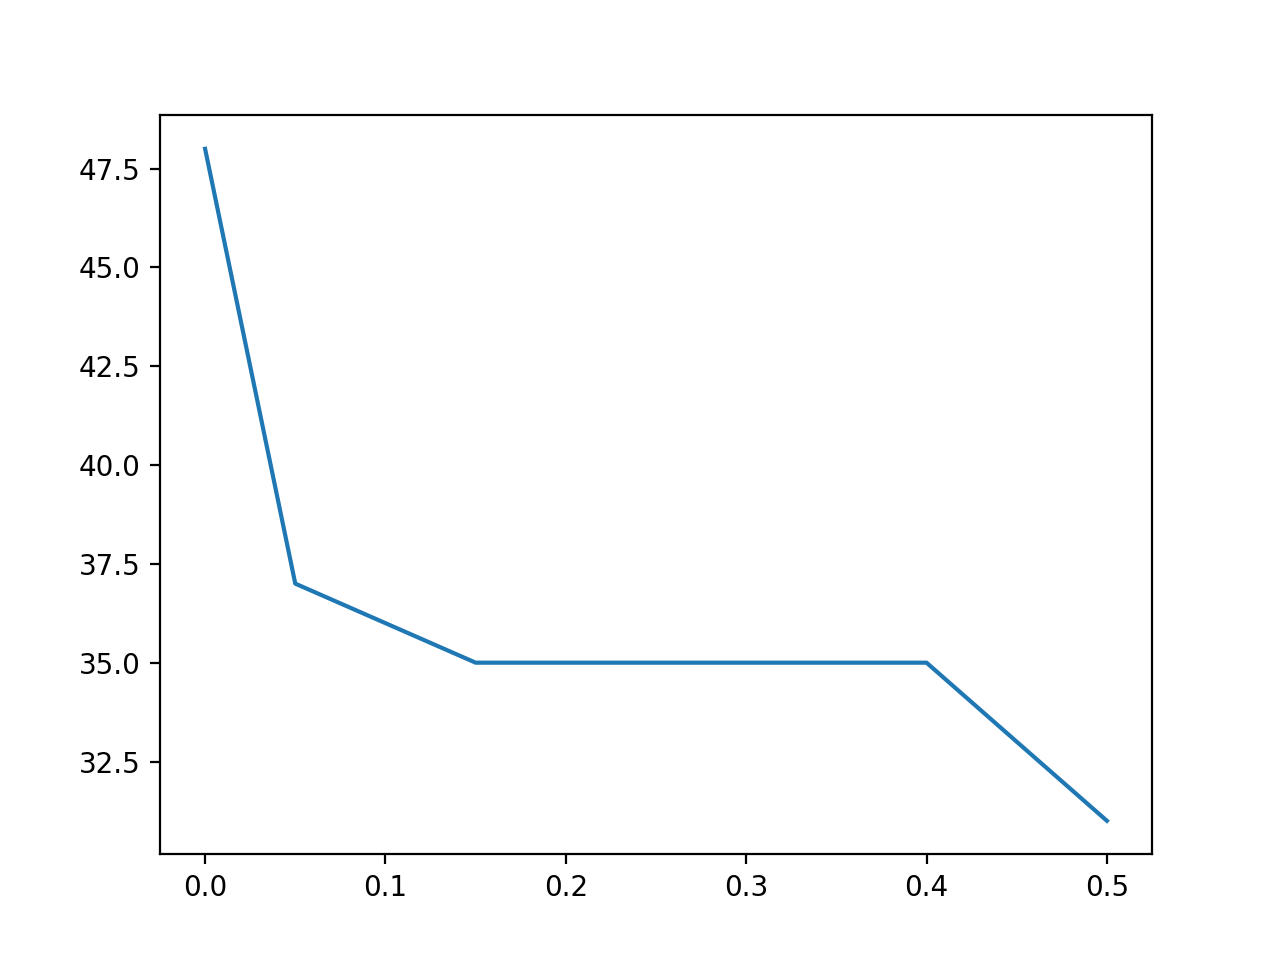

The `VarianceThreshold` is applied to the raw dataset with values from $0.0$ to $0.5$ and the number of remaining features after the transform is applied are reported. The number of features in the dataset quickly drops from 49 in the unchanged data down to 35 with a threshold of $0.15$. It later drops to 31 (18 columns deleted) with a threshold of $0.5$.

A line plot is created to show the relationship between the threshold and the number of features in the transformed dataset. We can see that even with a small threshold between 0.15 and 0.4, that a large number of features (14) are removed immediately.

---

## 7. Identify Rows That Contain Duplicate Data

Rows that have identical data are could be useless to the modeling process, if not dangerously misleading during model evaluation. Here, a duplicate row is a row where each value in each column for that row appears in identically the same order (same column values) in another row. 

From a probabilistic perspective, you can think of duplicate data as adjusting the priors for a class label or data distribution. This may help an algorithm like Naive Bayes if you wish to purposefully bias the priors. Typically, this is not the case and machine learning algorithms will perform better by identifying and removing rows with duplicate data. From an algorithm evaluation perspective, duplicate rows will result in misleading performance. For example, it is possible for a duplicate row or rows to appear in both train and test datasets and any evaluation of the model on these rows will be (or should be) correct. This will result in an optimistically biased estimate of performance on unseen data.

If you think this is not the case for your dataset or chosen model, design a controlled experiment to test it. This could be achieved by evaluating model skill with the raw dataset and the dataset with duplicates removed and comparing performance. Another experiment might involve augmenting the dataset with different numbers of randomly selected duplicate examples.

The Pandas function `duplicated()` will report whether a given row is duplicated or not. All rows are marked as either False to indicate that it is not a duplicate or True to indicate that it is a duplicate. If there are duplicates, the first occurrence of the row is marked False (by default).

- In the *iris flowers* dataset, determine the duplicated entries using the Pandas function `duplicated()`. You should expect 3 duplicated entries.

In [74]:
iris = pd.read_csv('iris.csv', header = None)
iris_dup = iris.duplicated()
iris_dup.value_counts()

False    147
True       3
dtype: int64

---

## 8. Delete Rows That Contain Duplicate Data

Rows of duplicate data should probably be deleted from your dataset prior to modeling.


There are many ways to achieve this, although Pandas provides the `drop_duplicates()` function that achieves exactly this.
- Use the `drop_duplicated()` function to delete the duplicate rows from the *iris flowers* dataset. Your Your dataset should have a shape of `(147, 5)`.

In [77]:
iris.drop_duplicates(inplace = True)
iris.shape

(147, 5)

---

## 9. References

- [numpy.unique](https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html)
- [pandas.DataFrame.nunique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)
- [pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)
- [pandas.DataFrame.duplicated](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html)
- [pandas.DataFrame.drop duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)